In [1]:
##import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [3]:
for dirname, filenames in os.walk('/content/train.csv'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [4]:
#package installation
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=70614c5f37a8a1769b89ce68d1b97565f5dafb918953e0e86689bd3c72007183
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [5]:
#import ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report , mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

In [6]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [7]:
#read the train datasets
df= pd.read_csv('/content/train.csv')
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [8]:
#check the shape
df.shape

(29451, 12)

In [9]:
# read the first five records of the datasets
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [10]:
#check the information about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [11]:
#to display all the columns
pd.pandas.set_option('display.max_columns',None)

In [12]:
#Describes our datasets
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [13]:
#Read the all columns
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [14]:
#Read the last five row of the datasets
df.tail()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


In [15]:
#Check the datatypes of the columns
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

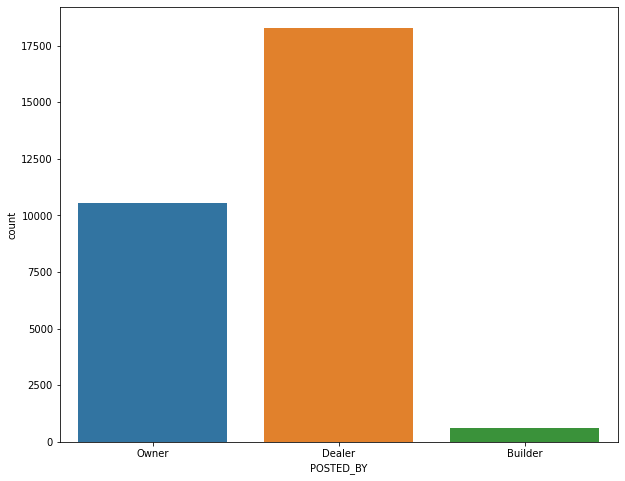

In [16]:
#To count the categorical variables in POSTED_BY column
plt.figure(figsize = (10,8))
sns.countplot(data = df , x= 'POSTED_BY' )

In [17]:
#To count and display all the categorical variables in each column in df
for column in df:
    uniq_val = np.unique(df[column])
    np_val = len(uniq_val)
    if np_val < 10:
      print('the number of values for features {} is : {} --{}'.format(column, np_val, uniq_val))
    else:
      print('the number of values for feature {} is : {}'.format(column, np_val))

the number of values for features POSTED_BY is : 3 --['Builder' 'Dealer' 'Owner']
the number of values for features UNDER_CONSTRUCTION is : 2 --[0 1]
the number of values for features RERA is : 2 --[0 1]
the number of values for feature BHK_NO. is : 16
the number of values for features BHK_OR_RK is : 2 --['BHK' 'RK']
the number of values for feature SQUARE_FT is : 19561
the number of values for features READY_TO_MOVE is : 2 --[0 1]
the number of values for features RESALE is : 2 --[0 1]
the number of values for feature ADDRESS is : 6899
the number of values for feature LONGITUDE is : 4087
the number of values for feature LATITUDE is : 4078
the number of values for feature TARGET(PRICE_IN_LACS) is : 1172


In [18]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [19]:
#Extracting the city from ADDRESS column and drop the ADDRESS column
df['CITY'] = df['ADDRESS'].str.split(',').str[-1]
df = df.drop(['ADDRESS'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


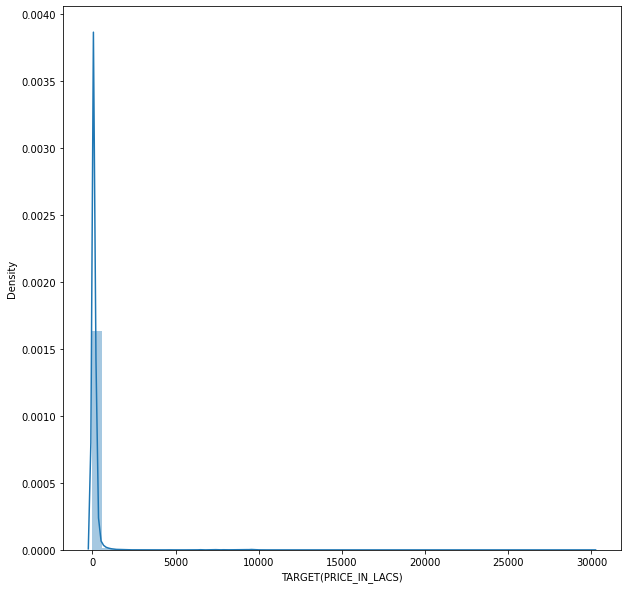

In [20]:
#Check the distribution of target price
plt.figure(figsize=(10,10))
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

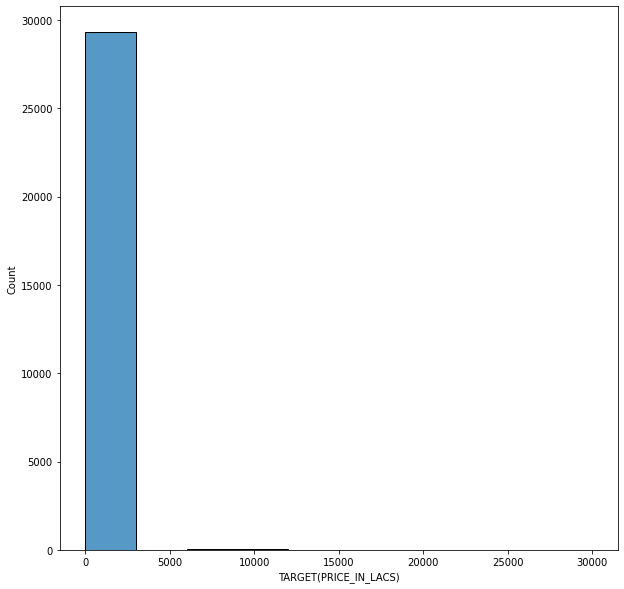

In [21]:
plt.figure(figsize=(10,10))
sns.histplot(df['TARGET(PRICE_IN_LACS)'],bins=10)

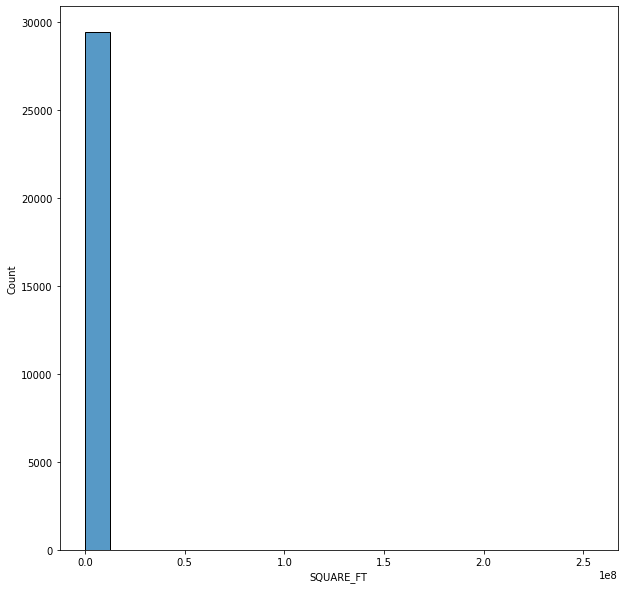

In [22]:
plt.figure(figsize=(10,10))
sns.histplot(df['SQUARE_FT'],bins = 20)

In [23]:
#Change the SQUARE_FT value into log value
df['SQUARE_FT']= np.log(df['SQUARE_FT'])

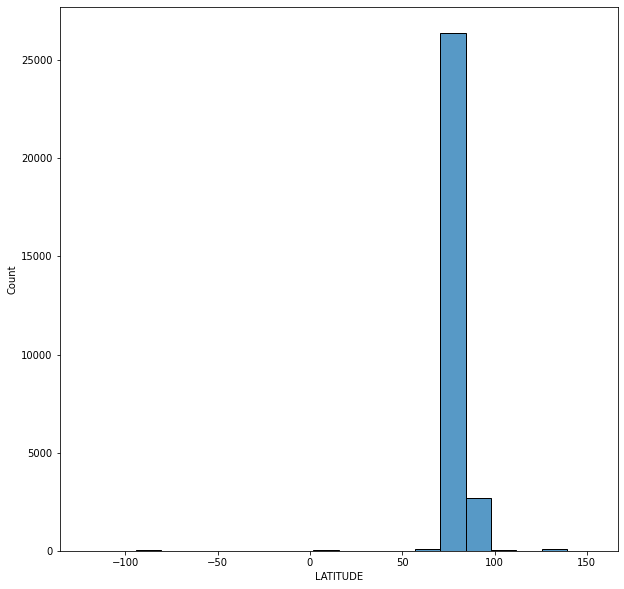

In [24]:
plt.figure(figsize=(10,10))
sns.histplot(df['LATITUDE'], bins =20)

In [25]:
#Change the LATITUDE AND LONGITUDE values into log value
df['LATITUDE']= np.log(df['LATITUDE'])
df['LONGITUDE']= np.log(df['LONGITUDE'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,7.170301,1,1,2.562632,4.351541,55.0,Bangalore
1,Dealer,0,0,2,BHK,7.150701,1,1,2.507527,4.339179,51.0,Mysore
2,Owner,0,0,2,BHK,6.838576,1,1,2.547728,4.351982,43.0,Bangalore
3,Owner,0,1,2,BHK,6.835100,1,1,3.354885,4.348269,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,6.906764,0,1,3.117605,4.482832,60.5,Kolkata


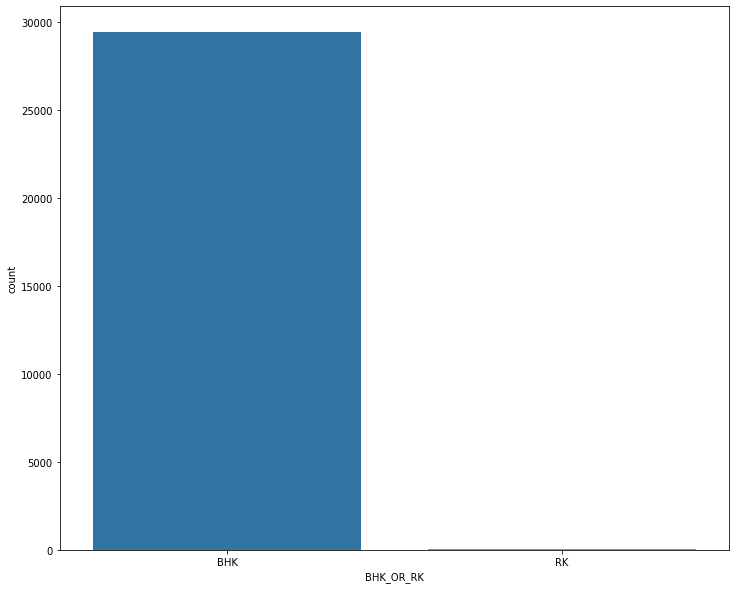

In [27]:
#Count the categorical value for BHK_RK column
plt.figure(figsize = (12,10))
sns.countplot(data= df, x = 'BHK_OR_RK')

In [28]:
#Check the unique values in CITY
df['CITY'].unique()

array(['Bangalore', 'Mysore', 'Ghaziabad', 'Kolkata', 'Kochi', 'Jaipur',
       'Mohali', 'Chennai', 'Siliguri', 'Noida', 'Raigad', 'Bhubaneswar',
       'Wardha', 'Pune', 'Mumbai', 'Nagpur', 'Deoghar', 'Bhiwadi',
       'Faridabad', 'Lalitpur', 'Maharashtra', 'Vadodara',
       'Visakhapatnam', 'Vapi', 'Mangalore', 'Aurangabad', 'Ottapalam',
       'Vijayawada', 'Belgaum', 'Bhopal', 'Lucknow', 'Kanpur',
       'Gandhinagar', 'Pondicherry', 'Agra', 'Ranchi', 'Gurgaon', 'Udupi',
       'Indore', 'Jodhpur', 'Coimbatore', 'Valsad', 'Palghar', 'Surat',
       'Varanasi', 'Guwahati', 'Amravati', 'Anand', 'Tirupati',
       'Secunderabad', 'Raipur', 'Vizianagaram', 'Thrissur', 'Satna',
       'Madurai', 'Chandigarh', 'Shimla', 'Gwalior', 'Rajkot', 'Sonipat',
       'Allahabad', 'Berhampur', 'Roorkee', 'Dharuhera', 'Latur',
       'Durgapur', 'Panchkula', 'Solapur', 'Durg', 'Goa', 'Jamshedpur',
       'Hazaribagh', 'Jabalpur', 'Hosur', 'Morbi', 'Hubli', 'Karnal',
       'Patna', 'Bilaspur', '

In [29]:
#Classify the city into three types using map function
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
df['city_tier'] = df['CITY'].apply(map_city)

In [30]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,city_tier
0,Owner,0,0,2,BHK,7.170301,1,1,2.562632,4.351541,55.0,Bangalore,tier1
1,Dealer,0,0,2,BHK,7.150701,1,1,2.507527,4.339179,51.0,Mysore,tier2
2,Owner,0,0,2,BHK,6.838576,1,1,2.547728,4.351982,43.0,Bangalore,tier1
3,Owner,0,1,2,BHK,6.835100,1,1,3.354885,4.348269,62.5,Ghaziabad,tier2
4,Dealer,1,0,2,BHK,6.906764,0,1,3.117605,4.482832,60.5,Kolkata,tier1


In [31]:
#drop the city column
df = df.drop('CITY',axis=1)

In [32]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_tier
0,Owner,0,0,2,BHK,7.170301,1,1,2.562632,4.351541,55.0,tier1
1,Dealer,0,0,2,BHK,7.150701,1,1,2.507527,4.339179,51.0,tier2
2,Owner,0,0,2,BHK,6.838576,1,1,2.547728,4.351982,43.0,tier1
3,Owner,0,1,2,BHK,6.835100,1,1,3.354885,4.348269,62.5,tier2
4,Dealer,1,0,2,BHK,6.906764,0,1,3.117605,4.482832,60.5,tier1


In [33]:
#List the categorical column in features
features = ['POSTED_BY','BHK_OR_RK','city_tier']

In [34]:
#give dummies into categorical features
new_df = pd.get_dummies(df, columns = features)

In [35]:
#Check the null values in new_df
new_df.isna().sum()

UNDER_CONSTRUCTION        0
RERA                      0
BHK_NO.                   0
SQUARE_FT                 0
READY_TO_MOVE             0
RESALE                    0
LONGITUDE                12
LATITUDE                 83
TARGET(PRICE_IN_LACS)     0
POSTED_BY_Builder         0
POSTED_BY_Dealer          0
POSTED_BY_Owner           0
BHK_OR_RK_BHK             0
BHK_OR_RK_RK              0
city_tier_tier1           0
city_tier_tier2           0
city_tier_tier3           0
dtype: int64

In [36]:
new_df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,city_tier_tier1,city_tier_tier2,city_tier_tier3
0,0,0,2,7.170301,1,1,2.562632,4.351541,55.0,0,0,1,1,0,1,0,0
1,0,0,2,7.150701,1,1,2.507527,4.339179,51.0,0,1,0,1,0,0,1,0
2,0,0,2,6.838576,1,1,2.547728,4.351982,43.0,0,0,1,1,0,1,0,0
3,0,1,2,6.835100,1,1,3.354885,4.348269,62.5,0,0,1,1,0,0,1,0
4,1,0,2,6.906764,0,1,3.117605,4.482832,60.5,0,1,0,1,0,1,0,0


In [37]:
new_df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,city_tier_tier1,city_tier_tier2,city_tier_tier3
count,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29439.000000,29368.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,7.086932,0.820244,0.929578,3.015511,4.342146,142.898746,0.021120,0.621065,0.357815,0.999185,0.000815,0.437914,0.365454,0.196632
std,0.383991,0.465675,0.879091,0.593580,0.383991,0.255861,0.302575,0.132190,656.880713,0.143786,0.485130,0.479365,0.028536,0.028536,0.496139,0.481566,0.397458
min,0.000000,0.000000,1.000000,1.098612,0.000000,0.000000,1.150810,0.441656,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,6.802418,1.000000,1.000000,2.915209,4.301420,38.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,7.069072,1.000000,1.000000,3.032625,4.348073,62.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,3.000000,7.346454,1.000000,1.000000,3.292161,4.355641,100.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,20.000000,19.354990,1.000000,1.000000,4.092892,5.030194,30000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
#Drop the null values rows in the LONGITUDE and LATITUDE column
new_df.dropna(subset= ['LATITUDE','LONGITUDE'], inplace = True)

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29357 entries, 0 to 29450
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29357 non-null  int64  
 1   RERA                   29357 non-null  int64  
 2   BHK_NO.                29357 non-null  int64  
 3   SQUARE_FT              29357 non-null  float64
 4   READY_TO_MOVE          29357 non-null  int64  
 5   RESALE                 29357 non-null  int64  
 6   LONGITUDE              29357 non-null  float64
 7   LATITUDE               29357 non-null  float64
 8   TARGET(PRICE_IN_LACS)  29357 non-null  float64
 9   POSTED_BY_Builder      29357 non-null  uint8  
 10  POSTED_BY_Dealer       29357 non-null  uint8  
 11  POSTED_BY_Owner        29357 non-null  uint8  
 12  BHK_OR_RK_BHK          29357 non-null  uint8  
 13  BHK_OR_RK_RK           29357 non-null  uint8  
 14  city_tier_tier1        29357 non-null  uint8  
 15  ci

In [40]:
#Check the null value
new_df.isnull().any()

UNDER_CONSTRUCTION       False
RERA                     False
BHK_NO.                  False
SQUARE_FT                False
READY_TO_MOVE            False
RESALE                   False
LONGITUDE                False
LATITUDE                 False
TARGET(PRICE_IN_LACS)    False
POSTED_BY_Builder        False
POSTED_BY_Dealer         False
POSTED_BY_Owner          False
BHK_OR_RK_BHK            False
BHK_OR_RK_RK             False
city_tier_tier1          False
city_tier_tier2          False
city_tier_tier3          False
dtype: bool

In [41]:
new_df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,city_tier_tier1,city_tier_tier2,city_tier_tier3
0,0,0,2,7.170301,1,1,2.562632,4.351541,55.0,0,0,1,1,0,1,0,0
1,0,0,2,7.150701,1,1,2.507527,4.339179,51.0,0,1,0,1,0,0,1,0
2,0,0,2,6.838576,1,1,2.547728,4.351982,43.0,0,0,1,1,0,1,0,0
3,0,1,2,6.835100,1,1,3.354885,4.348269,62.5,0,0,1,1,0,0,1,0
4,1,0,2,6.906764,0,1,3.117605,4.482832,60.5,0,1,0,1,0,1,0,0


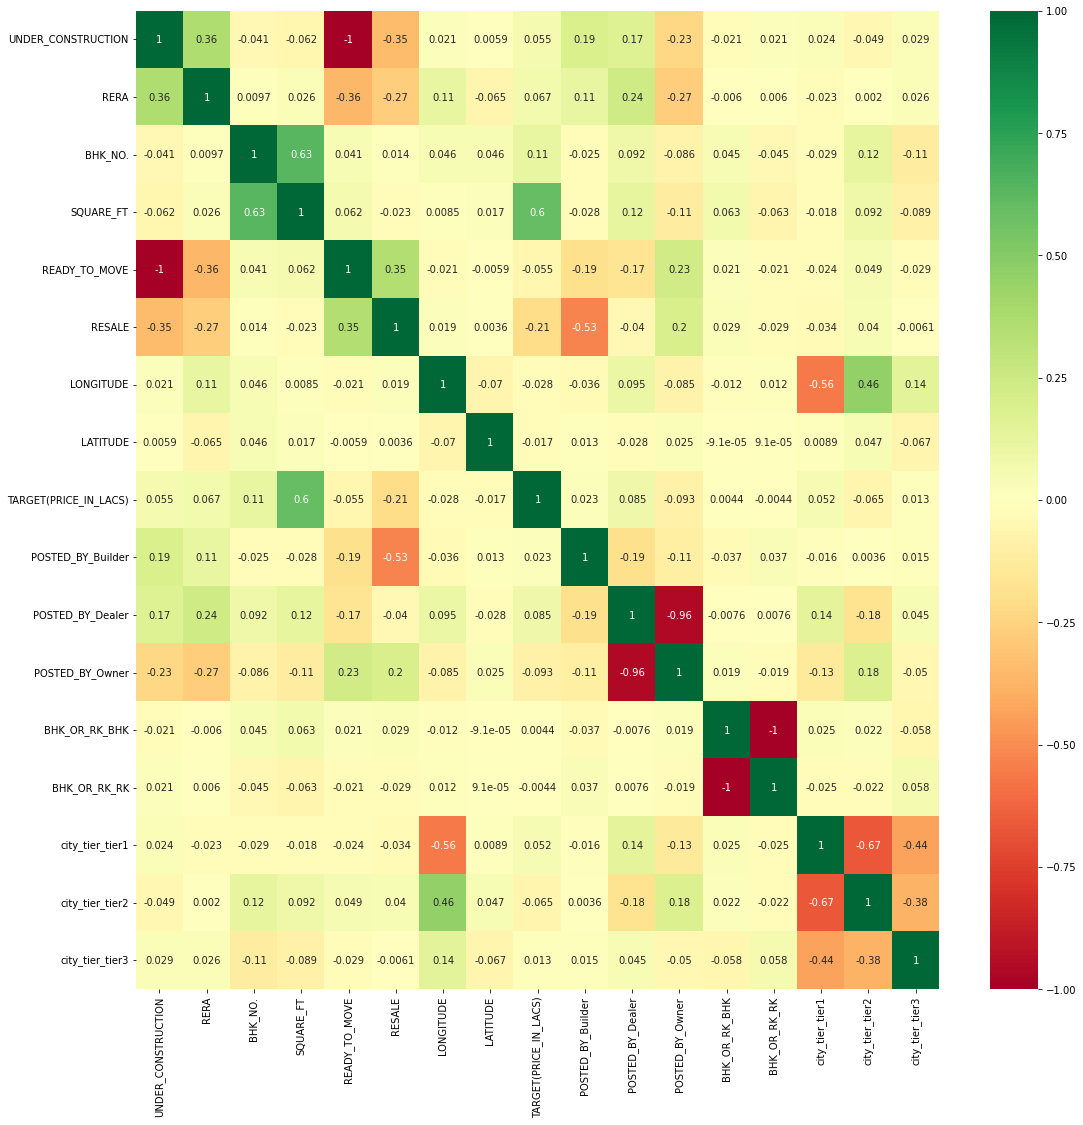

In [42]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(new_df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

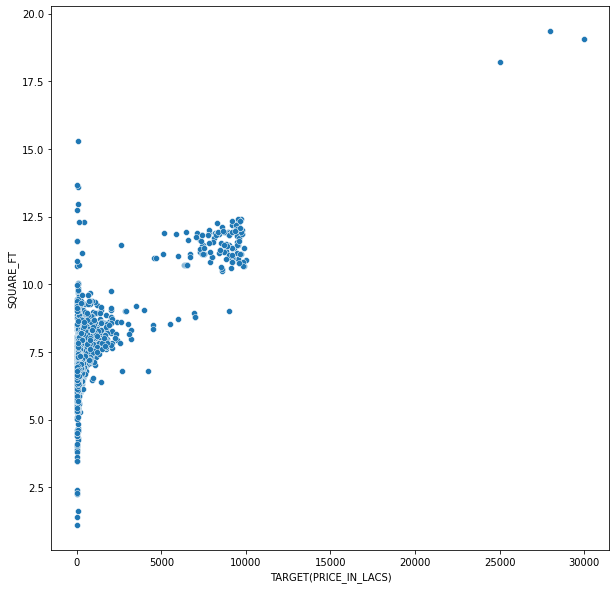

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = df , x = 'TARGET(PRICE_IN_LACS)', y ='SQUARE_FT')

In [44]:
#Assign the independent attributes X and dependent attributes y
X = new_df.drop('TARGET(PRICE_IN_LACS)',axis =1)
y = new_df['TARGET(PRICE_IN_LACS)']
X_train, X_valid , y_train, y_valid = train_test_split(X,y, test_size=0.3,random_state =100)

In [45]:
y_valid.head()

28089     68.0
4200      22.0
2094      31.3
4389     140.0
20079     70.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [46]:
X_train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,city_tier_tier1,city_tier_tier2,city_tier_tier3
29378,0,0,2,7.192996,1,1,2.559202,4.352553,0,0,1,1,0,1,0,0
14660,0,0,4,8.178141,1,1,2.920918,4.301032,0,1,0,1,0,1,0,0
16097,0,0,3,7.123758,1,1,2.562632,4.351541,0,0,1,1,0,1,0,0
12025,1,0,3,7.509539,0,1,3.052585,4.288128,0,1,0,1,0,0,1,0
5055,1,1,1,6.253899,0,1,2.952191,4.289536,0,1,0,1,0,1,0,0


In [47]:
y_train.head()

29378    120.0
14660    470.0
16097     75.0
12025     60.0
5055      51.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [48]:
print(X_train.shape)
print(y_train.shape)

(20549, 16)
(20549,)


TEST DATA 


In [49]:
test_df = pd.read_csv('/content/test.csv')

In [50]:
test_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [51]:
test_df.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [52]:
test_df.isnull().any()

POSTED_BY             False
UNDER_CONSTRUCTION    False
RERA                  False
BHK_NO.               False
BHK_OR_RK             False
SQUARE_FT             False
READY_TO_MOVE         False
RESALE                False
ADDRESS               False
LONGITUDE             False
LATITUDE              False
dtype: bool

In [53]:
#PREPOCESSING
print("Test data Info")
print("-"*75)
print(test_df.info())

print()
print()

print("Null values :")
print("-"*75)
test_df.dropna(inplace = True)
print(test_df.isnull().sum())

#EDA

#Extracting the city from ADDRESS column and drop the ADDRESS column
test_df['CITY'] = test_df['ADDRESS'].str.split(',').str[-1]
test_df = test_df.drop(['ADDRESS'],axis=1)

#Change the SQUARE_FT value into log value
test_df['SQUARE_FT']= np.log(test_df['SQUARE_FT'])

#Classify the city into three types using map function
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
test_df['city_tier'] = test_df['CITY'].apply(map_city)
#drop the city column
test_df = test_df.drop('CITY',axis=1)

#List the categorical column in features
features = ['POSTED_BY','BHK_OR_RK','city_tier']
#give dummies into categorical features
test_df = pd.get_dummies(test_df, columns = features)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB
None


Null values :
---------------------------------------------------------------------------
POST

In [54]:
test_df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,city_tier_tier1,city_tier_tier2,city_tier_tier3
0,0,0,1,6.301100,1,1,21.262000,73.047700,0,0,1,1,0,0,1,0
1,1,1,2,6.684612,0,0,18.966114,73.148278,0,1,0,1,0,0,0,1
2,0,0,2,7.136560,1,1,22.592200,88.484911,0,1,0,1,0,1,0,0
3,0,0,3,7.244463,1,1,26.988300,75.584600,0,1,0,1,0,0,1,0
4,0,0,1,6.064896,1,1,22.700000,72.870000,0,0,1,1,0,0,0,1


linear regression


In [55]:
new_df.isnull().any().any()

False

In [56]:
X_train.isnull().any()

UNDER_CONSTRUCTION    False
RERA                  False
BHK_NO.               False
SQUARE_FT             False
READY_TO_MOVE         False
RESALE                False
LONGITUDE             False
LATITUDE              False
POSTED_BY_Builder     False
POSTED_BY_Dealer      False
POSTED_BY_Owner       False
BHK_OR_RK_BHK         False
BHK_OR_RK_RK          False
city_tier_tier1       False
city_tier_tier2       False
city_tier_tier3       False
dtype: bool

In [57]:
lr  = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
print(lr.score(X_train, y_train))
print(lr.score(X_valid, y_valid))

0.5239044152045571
0.5182773671235665


Random Forest


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_model = RandomForestRegressor(n_estimators=100,random_state = 42)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_valid)
print('Random Forest: ',r2_score(y_valid, preds))

Random Forest:  0.9536009853458558


In [60]:
rf_model.score(X_train, y_train)

0.9917699356814199

In [61]:
rf_model.score(X_valid, y_valid)

0.9536009853458558

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


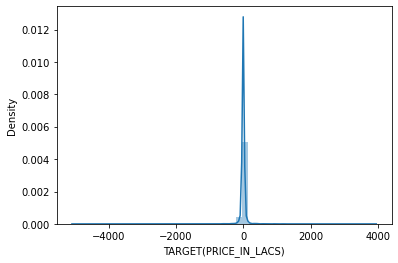

In [62]:
sns.distplot(y_valid-preds)
plt.show()

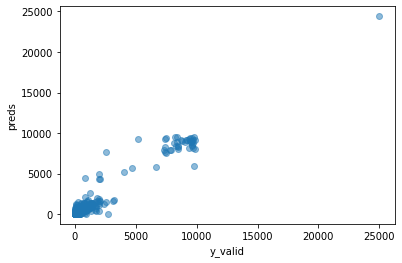

In [63]:
plt.scatter(y_valid, preds, alpha = 0.5)
plt.xlabel("y_valid")
plt.ylabel("preds")
plt.show()

In [64]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_valid, preds))
print('MSE:', metrics.mean_squared_error(y_valid, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, preds)))

MAE: 32.235475459512486
MSE: 20351.612980590773
RMSE: 142.65907955889375


In [66]:
# RMSE/(max(DV)-min(DV))

142.65907955889375/(max(y)-min(y))

0.0047553422798154565

In [67]:
r2_score(y_valid, preds)

0.9536009853458558

DECISION TREE REGRESSOR


In [68]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
preds =dt.predict(X_valid)
r2_score(y_valid, preds)

0.9178859658305921

In [69]:
dt.score(X_train, y_train)

0.9999711666333725

In [70]:
dt.score(X_valid, y_valid)

0.9178859658305921

In [71]:
from sklearn import metrics

In [72]:
print('MAE:', metrics.mean_absolute_error(y_valid, preds))
print('MSE:', metrics.mean_squared_error(y_valid, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, preds)))

MAE: 40.13864581981748
MSE: 36016.99424325022
RMSE: 189.78143808931952


In [73]:
# RMSE/(max(DV)-min(DV))

193.63890221570213/(max(y)-min(y))

0.006454683862888929

EXTRA TREE REGRESSOR


In [74]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor()

In [75]:
print(selection.feature_importances_)

[1.85884466e-03 3.31310645e-03 2.07965581e-02 8.13047106e-01
 1.38518225e-03 8.08349077e-02 2.42189952e-02 2.95725224e-02
 1.20304002e-04 5.31280504e-03 4.44387729e-03 3.70213622e-07
 3.77024728e-07 5.37591033e-03 7.61361668e-03 2.10551713e-03]


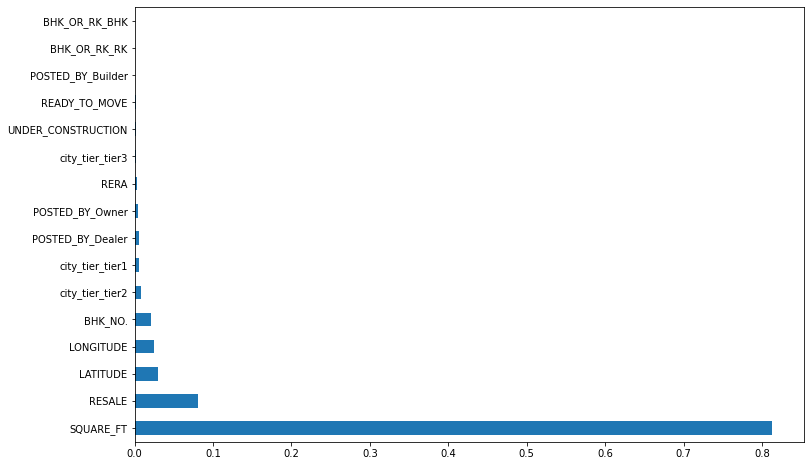

In [76]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [79]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [80]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42)

In [81]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  12.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  17.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [83]:
rf_random = RandomForestRegressor(n_estimators=700,random_state = 42)
rf_random.fit(X_train, y_train)
preds = rf_random.predict(X_valid)

In [84]:
preds = rf_random.predict(X_valid)
print('Random Forest: ',r2_score(y_valid, preds))

Random Forest:  0.9537994835228609


In [85]:
print('MAE:', metrics.mean_absolute_error(y_valid, preds))
print('MSE:', metrics.mean_squared_error(y_valid, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, preds)))

MAE: 32.19659190794523
MSE: 20264.547380041397
RMSE: 142.35359981412972


In [86]:
import pickle
# open a file, where you want to store the data
file = open('indian_house_price_prdiction_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [87]:
file.flush()

In [88]:
model = open('indian_house_price_prdiction_rf.pkl','rb')
forest = pickle.load(model)

In [89]:
preds = forest.predict(X_valid)

In [90]:
r2_score(y_valid,preds)

0.9537994835228609